# Car Price Prediction with Machine Learning

![Description](https://repository-images.githubusercontent.com/286819592/b82e14cf-3c85-4f91-84c0-bea095c353a8)



# **Problem Statement**

**Project Overview:**

In the automotive industry, determining the price of a car involves various factors, such as brand reputation, car features, horsepower, and fuel efficiency. Car price prediction is a crucial application of machine learning. This project is designed to help you learn how to build a model for car price prediction.

**Key Objectives:**

- Explore the factors affecting car prices.
- Create a machine learning model to predict car prices.
- Gain valuable experience in the field of machine learning and automotive pricing.

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import joblib
import seaborn as sns
import numpy as np
#scoring and tuning 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

### Dataset Loading

In [2]:
df = pd.read_csv('car data.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [5]:
# Dataset Info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
df.isna().any()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Driven_kms       False
Fuel_Type        False
Selling_type     False
Transmission     False
Owner            False
dtype: bool

#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 2


In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

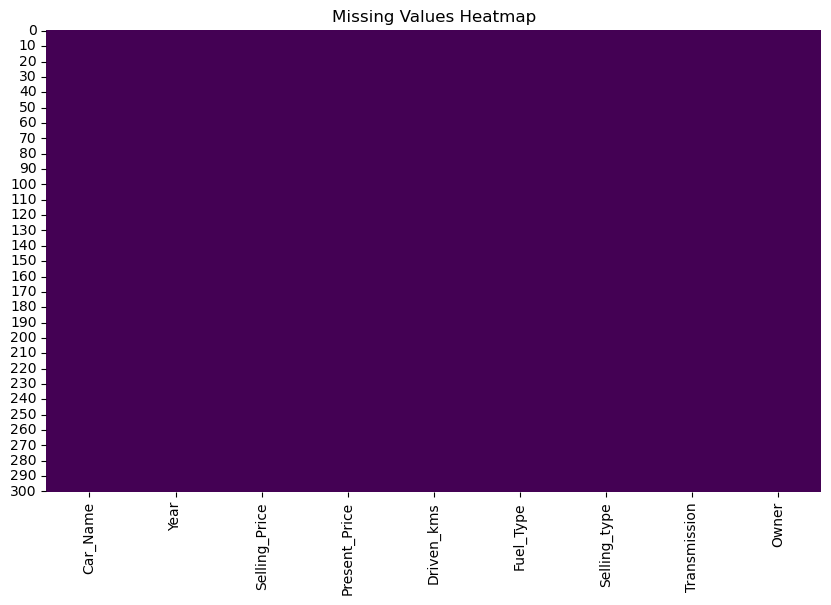

In [9]:
# Calculate missing values count
missing_values = df.isnull()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values, cmap='viridis', cbar=False)
plt.title('Missing Values Heatmap')
plt.show()

### No single **null** value

#### Conclusion
The uniform Heatmap show there is no single null value in the Data, therefore it does not need a modification or cleaning in data.

In [10]:
# Dataset Columns
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [11]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,301,301.00,301.00,301.00,301.00,301,301,301,301.00
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.63,4.66,7.63,36947.21,NaN,NaN,NaN,0.04
std,NaN,2.89,5.08,8.64,38886.88,NaN,NaN,NaN,0.25
min,NaN,2003.00,0.10,0.32,500.00,NaN,NaN,NaN,0.00
25%,NaN,2012.00,0.90,1.20,15000.00,NaN,NaN,NaN,0.00
50%,NaN,2014.00,3.60,6.40,32000.00,NaN,NaN,NaN,0.00
75%,NaN,2016.00,6.00,9.90,48767.00,NaN,NaN,NaN,0.00


### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in Car_Name is 98
No. of unique values in Year is 16
No. of unique values in Selling_Price is 156
No. of unique values in Present_Price is 148
No. of unique values in Driven_kms is 206
No. of unique values in Fuel_Type is 3
No. of unique values in Selling_type is 2
No. of unique values in Transmission is 2
No. of unique values in Owner is 3


## Data Vizualization

#### 1. Top 10 Most Selling Car

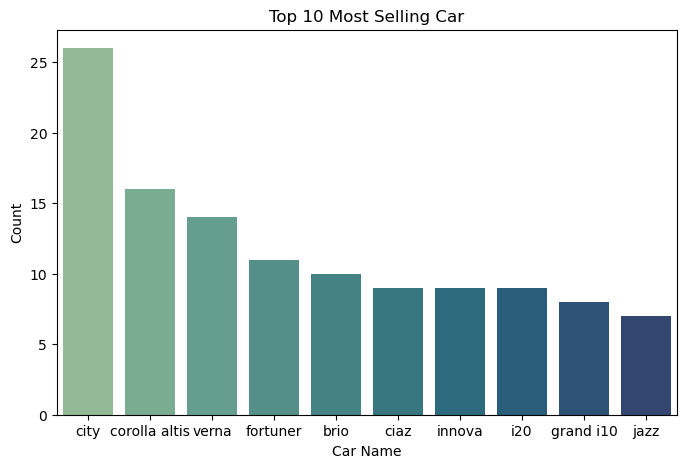

In [13]:

# Count the occurrences of each unique car name in the 'Car_Name' column and take the top 10 most selling car
top10 = df['Car_Name'].value_counts()[:10]

# Create a count plot to visualize the top 10 car
plt.figure(figsize=(8, 5))
sns.countplot(x='Car_Name', data=df, order=top10.index, palette='crest')

# Set labels and title for the plot
plt.xlabel('Car Name')
plt.ylabel('Count')
plt.title('Top 10 Most Selling Car')

# Display the plot
plt.show()

#### 2. Number of Cars Bought Each Year

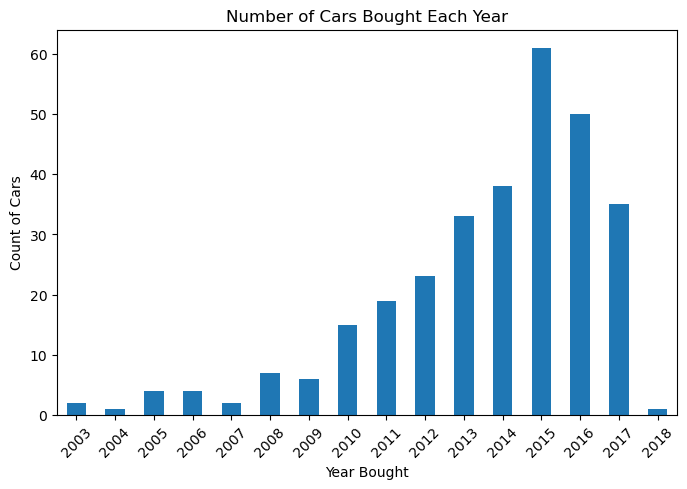

In [14]:

# Set the figure size for the plot
plt.figure(figsize=(8, 5))

# Group the data by the 'Year' column and count the number of occurrences for each year
yearly_counts = df.groupby('Year').count()['Car_Name']

# Create a bar plot to visualize the count of cars bought in each year
yearly_counts.plot(kind='bar')

# Rotate the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Set labels and title for the plot
plt.xlabel('Year Bought')
plt.ylabel('Count of Cars')
plt.title('Number of Cars Bought Each Year')

# Display the plot
plt.show()

#### 3. Distribution of Categorical Variable

<Axes: xlabel='Selling_type', ylabel='count'>

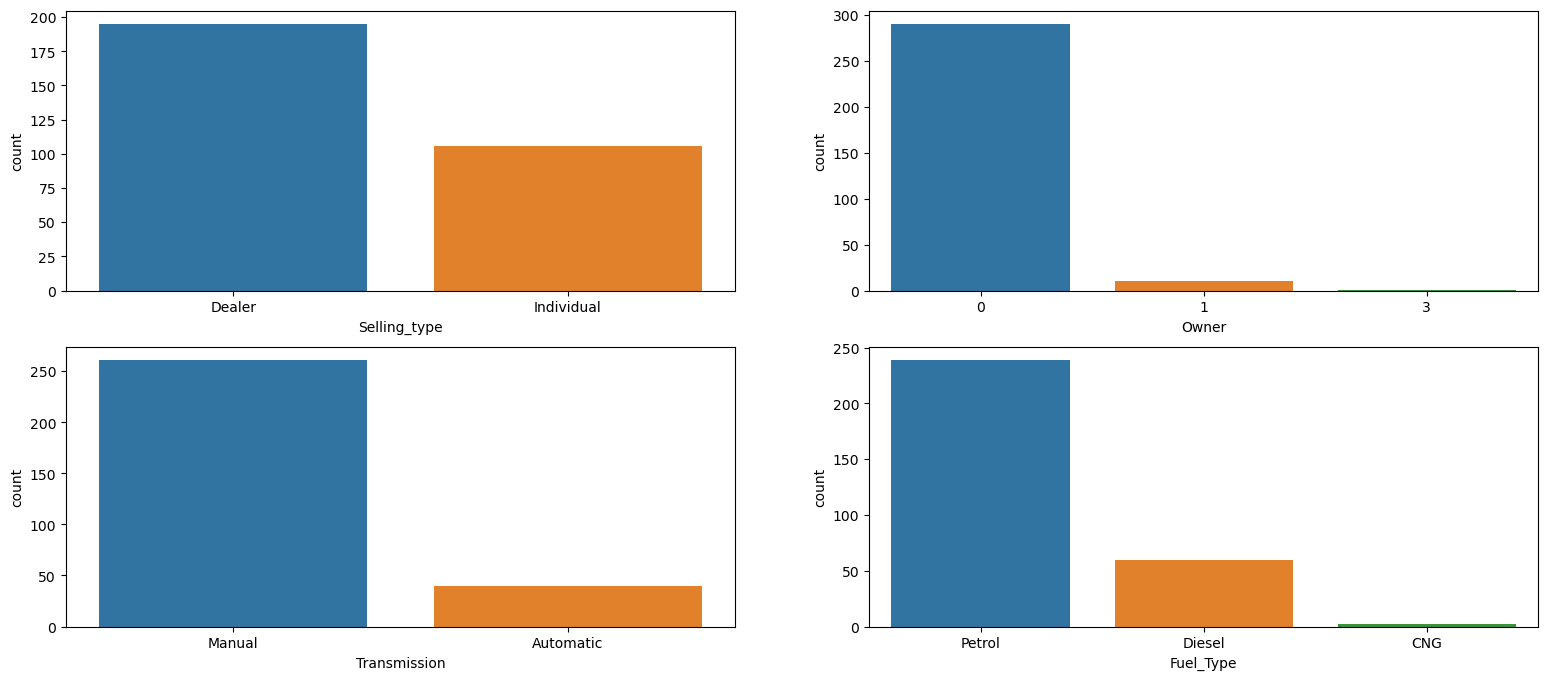

In [15]:
f, axes = plt.subplots(2,2, figsize=(19,8))
sns.countplot(x='Transmission',data=df, ax=axes[1,0])
sns.countplot(x='Fuel_Type',data=df,ax=axes[1,1])
sns.countplot(x='Owner',data=df,ax=axes[0,1])
sns.countplot(x='Selling_type',data=df,ax=axes[0,0])

### The value of a car with three prior owners or a car with CNG fuel type is quite low.
when making prediction with these type of cars, prediction more likely to vary


In [16]:
# Creating Total Price Differece feature which tells total differance made between Showroom Price and Selling Price
df['Price_Diff']=df['Present_Price']-df['Selling_Price']

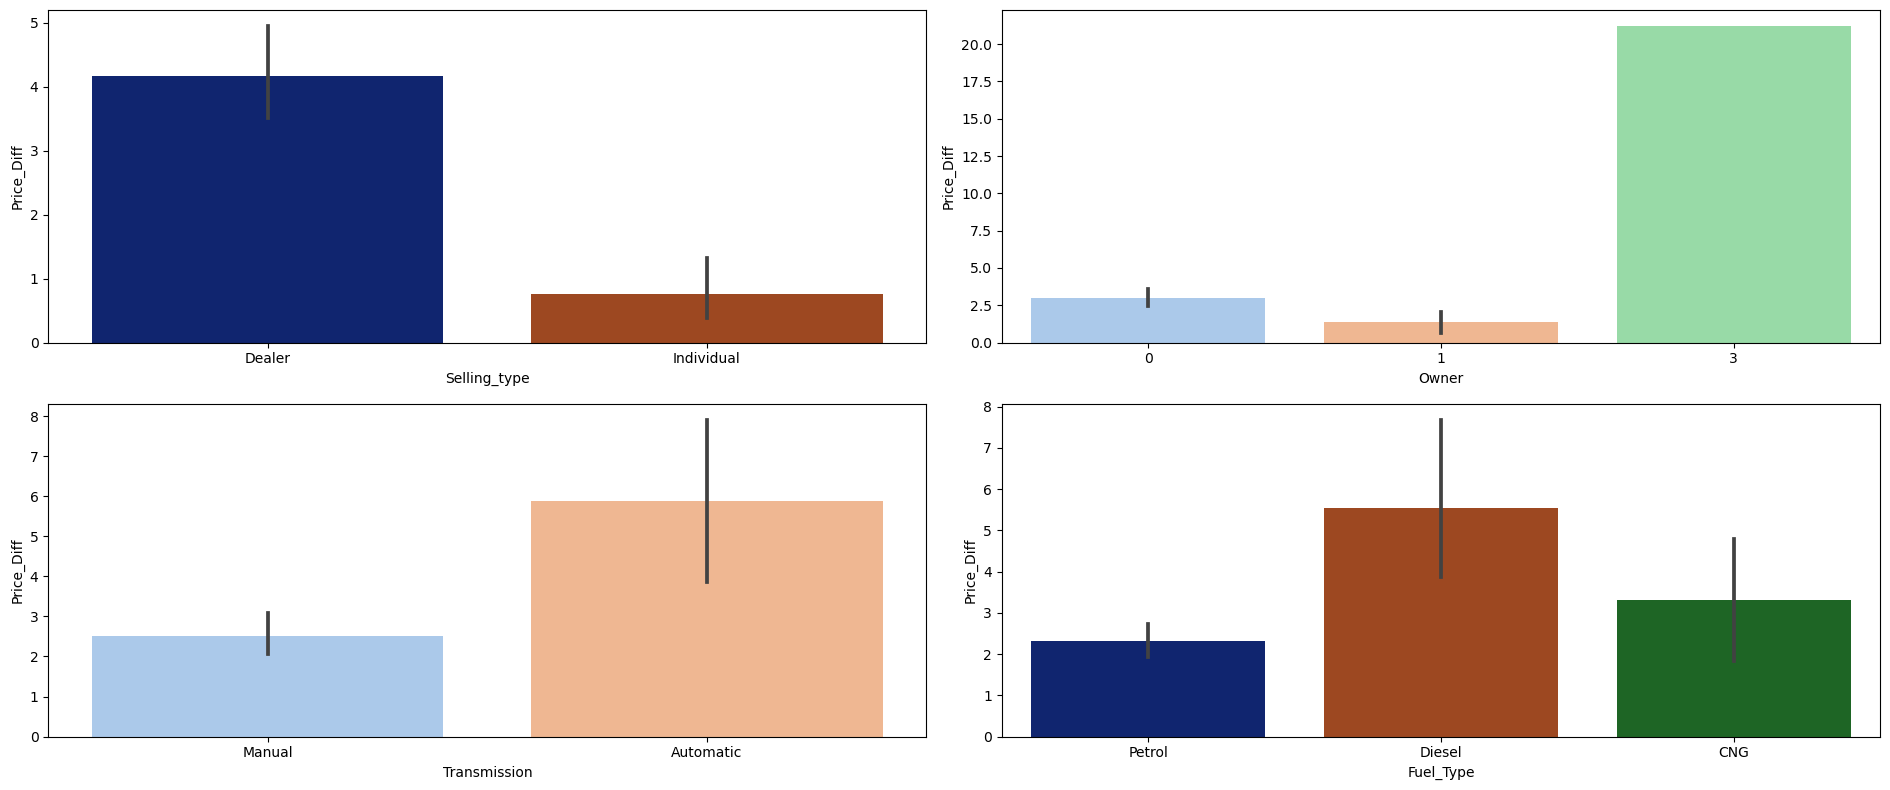

In [17]:
# Setting up the subplot grid
f, axes = plt.subplots(2, 2, figsize=(19, 8))

# Define color palettes
palette1 = sns.color_palette("pastel")
palette2 = sns.color_palette("dark")

# Plotting each bar plot with different colors
sns.barplot(x='Transmission', y='Price_Diff', data=df, ax=axes[1, 0], palette=palette1)
sns.barplot(x='Fuel_Type', y='Price_Diff', data=df, ax=axes[1, 1], palette=palette2)
sns.barplot(x='Owner', y='Price_Diff', data=df, ax=axes[0, 1], palette=palette1)
sns.barplot(x='Selling_type', y='Price_Diff', data=df, ax=axes[0, 0], palette=palette2)

# Adjusting layout and adding titles
plt.tight_layout()
plt.show()


#### All categorical data has some kind of trend regarding the car's current pricing and selling price.

In [18]:
df['Year']=2019-df['Year']

<Axes: xlabel='Year', ylabel='Selling_Price'>

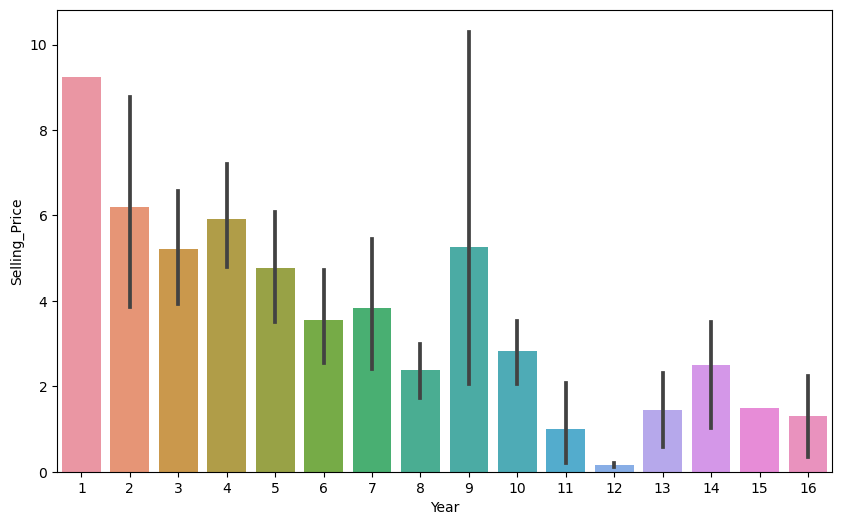

In [19]:
plt.figure(figsize=(10,6))
sns.barplot(x='Year',y='Selling_Price',data=df)

#### Car usage in years and its selling price have a negative correlation.
#### It's evident that the value of ancare decreases as it gets older.

#### 4. Driven Kilometers vs Selling Price

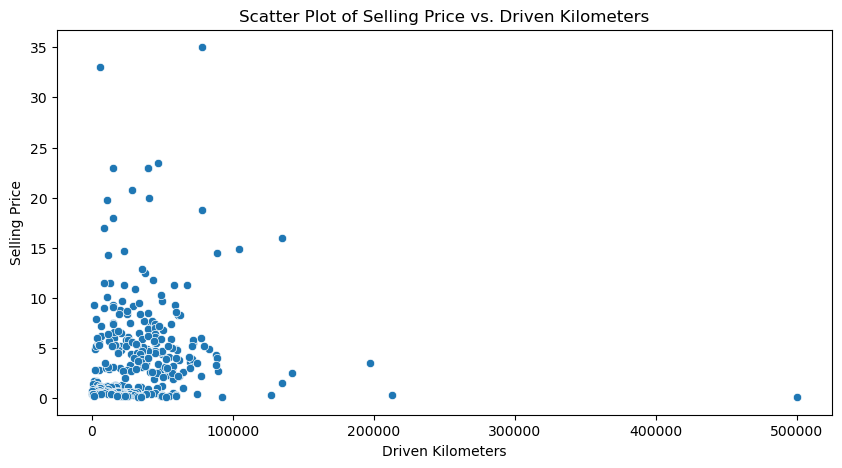

In [20]:
# Set the figure size for the plot
plt.figure(figsize=(10,5))

# Create a scatter plot to visualize the relationship between Driven_kms and Selling_Price
sns.scatterplot(data=df, x='Driven_kms', y='Selling_Price')

# Set labels for the x and y axes
plt.xlabel('Driven Kilometers')
plt.ylabel('Selling Price')

# Add a title to the plot
plt.title('Scatter Plot of Selling Price vs. Driven Kilometers')

# Display the plot
plt.show()

# Now it's time to train our model

In [21]:
cv=5
r2=[]
cv_score=[]
mae=[]
mse=[]

In [22]:
X=df.drop('Selling_Price',axis=1)

In [23]:
y=df['Selling_Price'] 

In [24]:

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [25]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((210, 9), (210,), (91, 9), (91,))

In [26]:

# Checking the train distribution of dependent variable
y_train.value_counts()

Selling_Price
0.45     6
0.60     6
0.20     5
4.00     5
4.50     5
        ..
14.90    1
2.55     1
35.00    1
14.73    1
1.10     1
Name: count, Length: 124, dtype: int64

In [27]:
# Defining a function to print evaluation matrix
def evaluate_model(model, y_test, y_pred):

  '''takes model, y test and y pred values to print evaluation metrics, plot the actual and predicted values,
  plot the top 5 important features, and returns a list of the model scores'''

  # Apply inverse log transformation to y_test and y_pred as we have used log transformation
  y_t = np.exp(y_test)
  y_p = np.exp(y_pred)
  y_train2 = np.exp(y_train)
  y_train_pred = np.exp(model.predict(X_train))

  # Calculating Evaluation Matrix
  mse = mean_squared_error(y_t,y_p)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_t,y_p)
  r2_train = r2_score(y_train2, y_train_pred)
  r2 = r2_score(y_t,y_p)
  r2_adjusted = 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))

  # Printing Evaluation Matrix
  print("MSE :" , mse)
  print("RMSE :" ,rmse)
  print("MAE :" ,mae)
  print("Train R2 :" ,r2_train)
  print("Test R2 :" ,r2)
  print("Adjusted R2 : ", r2_adjusted)


  # plot actual and predicted values
  plt.figure(figsize=(12,4))
  plt.plot((y_p)[:100])
  plt.plot((np.array(y_t)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Selling Price', fontsize=12)

  try:
    importance = model.feature_importances_
  except:
    importance = model.coef_
  importance = np.absolute(importance)
  if len(importance)==len(features):
    pass
  else:
    importance = importance[0]

  # Feature importances
  feat = pd.Series(importance, index=features)
  plt.figure(figsize=(7,4))
  plt.title('Feature Importances (top 5) for '+str(model), fontsize = 12)
  plt.xlabel('Relative Importance')
  feat.nlargest(5).plot(kind='barh')


  model_score = [mse,rmse,mae,r2_train,r2,r2_adjusted]
  return model_score
     

In [28]:
# Create a score dataframe
score = pd.DataFrame(index = ['MSE', 'RMSE', 'MAE', 'Train R2', 'Test R2', 'Adjusted R2'])
     

## Classis Linear Regression

In [29]:
import pandas as pd

print(X_train.dtypes)

Car_Name          object
Year               int64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
Price_Diff       float64
dtype: object


In [30]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
X_train = X_train.drop(columns=['Car_Name'])
X_test = X_test.drop(columns=['Car_Name'])


In [31]:
from sklearn.compose import ColumnTransformer
# Define the columns to be encoded and the transformer
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission']
one_hot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot, categorical_features)],
    remainder='passthrough')  # Keep the remaining columns as they are

# Apply the transformations
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

In [32]:
# Initialize Linear Regression model
lr = LinearRegression()
lr.fit(X_train_encoded, y_train)

# Predict on the test set
y_pred_lr = lr.predict(X_test_encoded)

# Calculate performance metrics
r2_lr = r2_score(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
cv_scores_lr = cross_val_score(lr, X_train_encoded, y_train, cv=5)

# Print performance metrics
print(f"Linear Regression Model")
print(f"r^2 value : {r2_lr}")
print(f"mean square error: {mse_lr}")
print(f"mean absolute error: {mae_lr}")
print(f"CV score: {np.mean(cv_scores_lr)}")


Linear Regression Model
r^2 value : 1.0
mean square error: 2.7966571791528636e-28
mean absolute error: 1.2774274922349123e-14
CV score: 1.0


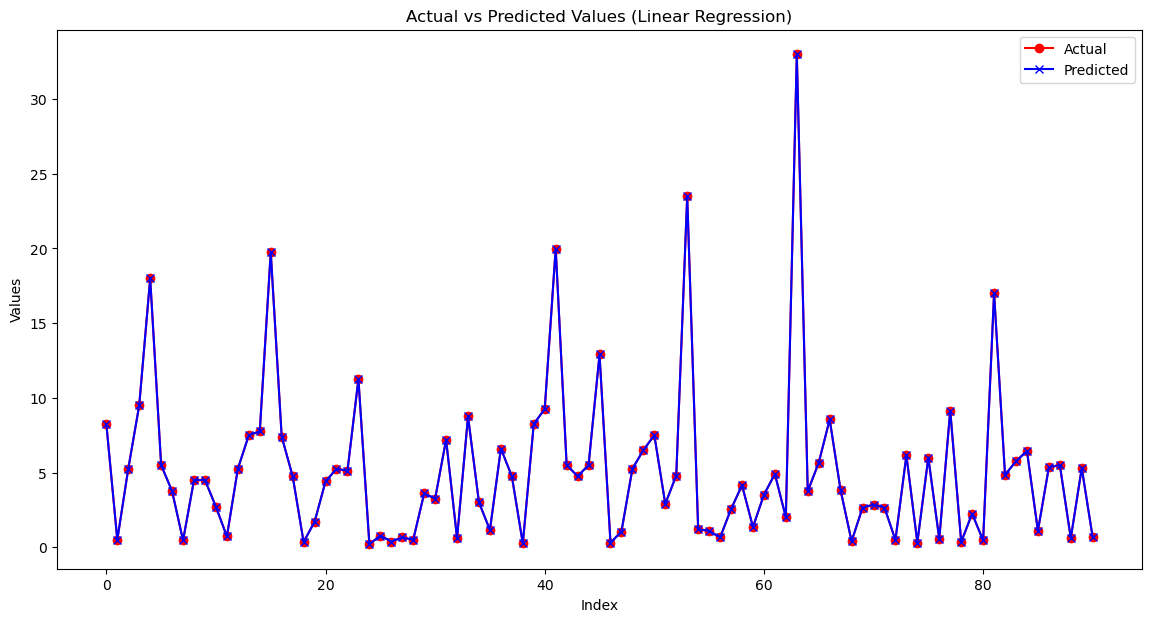

In [33]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual', color='red', marker='o')
plt.plot(y_pred_lr, label='Predicted', color='blue', marker='x')
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()


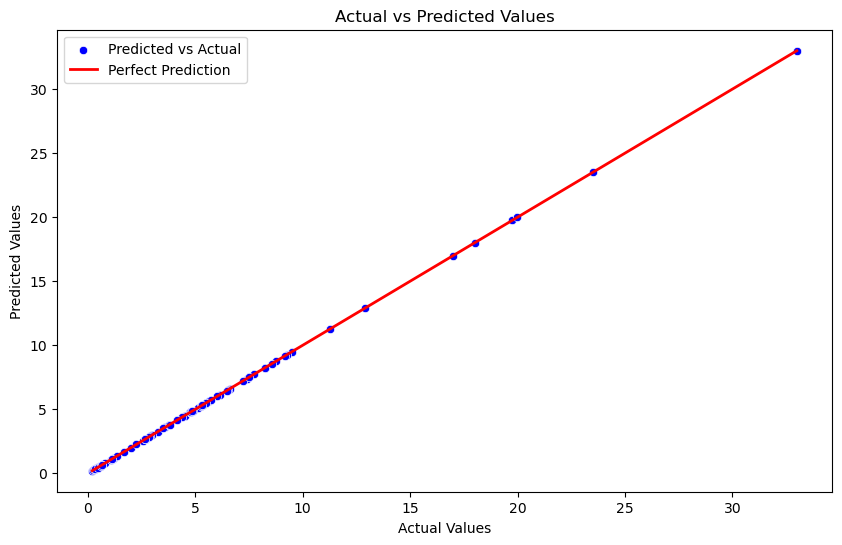

In [34]:
# Predicted vs Actual plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lr, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()

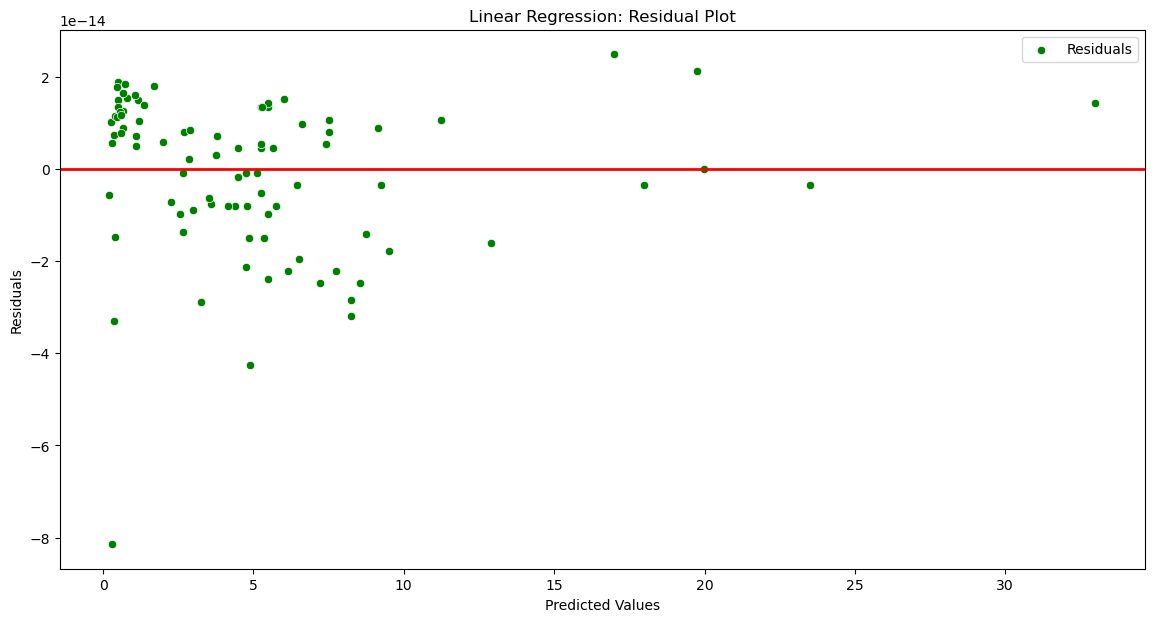

In [35]:
residuals_lr = y_test - y_pred_lr
plt.figure(figsize=(14, 7))
sns.scatterplot(x=y_pred_lr, y=residuals_lr, color='green', label='Residuals')
plt.axhline(0, color='red', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linear Regression: Residual Plot')
plt.legend()
plt.show()


## Random Forest

In [36]:
# Define the columns to be encoded and the transformer
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission']
one_hot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot, categorical_features)],
    remainder='passthrough')  # Keep the remaining columns as they are

# Apply the transformations
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Initialize and fit the Random Forest model
rfr = RandomForestRegressor()
rfr.fit(X_train_encoded, y_train)

# Predict on the test set
y_pred_rf = rfr.predict(X_test_encoded)

# Calculate performance metrics
r2 = r2_score(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
mae = mean_absolute_error(y_test, y_pred_rf)
cv_scores = cross_val_score(rfr, X_train_encoded, y_train, cv=5)

# Print performance metrics
print(f"RandomForestRegressor()")
print(f"r^2 value : {r2}")
print(f"mean square error: {mse}")
print(f"mean absolute error: {mae}")
print(f"CV score: {np.mean(cv_scores)}")

RandomForestRegressor()
r^2 value : 0.9115913814190445
mean square error: 2.6439531607692293
mean absolute error: 0.6614252747252745
CV score: 0.8793768757197713


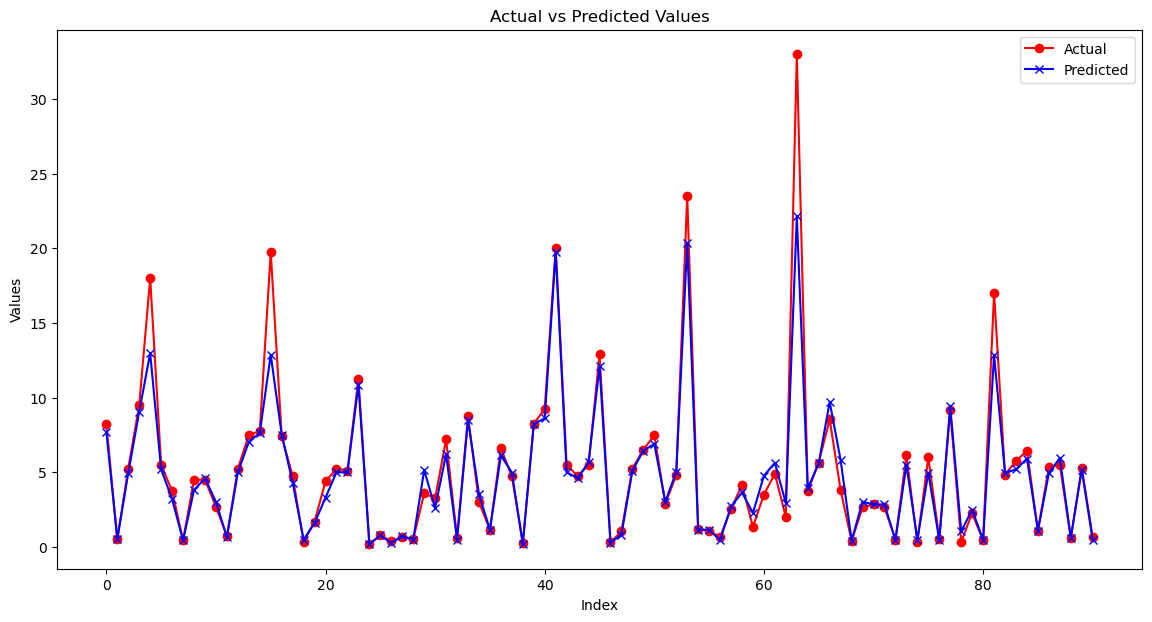

In [37]:
# Visualization of actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual', color='red', marker='o')
plt.plot(y_pred_rf, label='Predicted', color='blue', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()

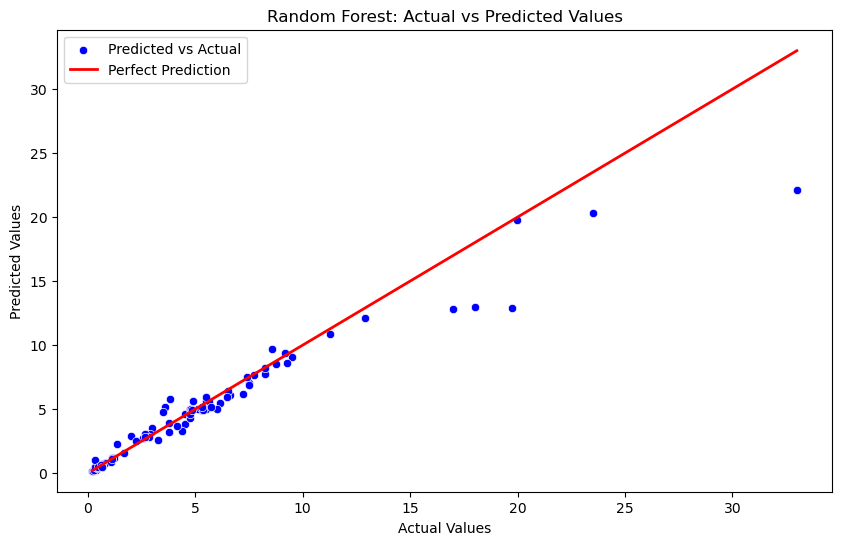

In [38]:
# Predicted vs Actual plot for Random Forest
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Actual vs Predicted Values')
plt.legend()
plt.show()

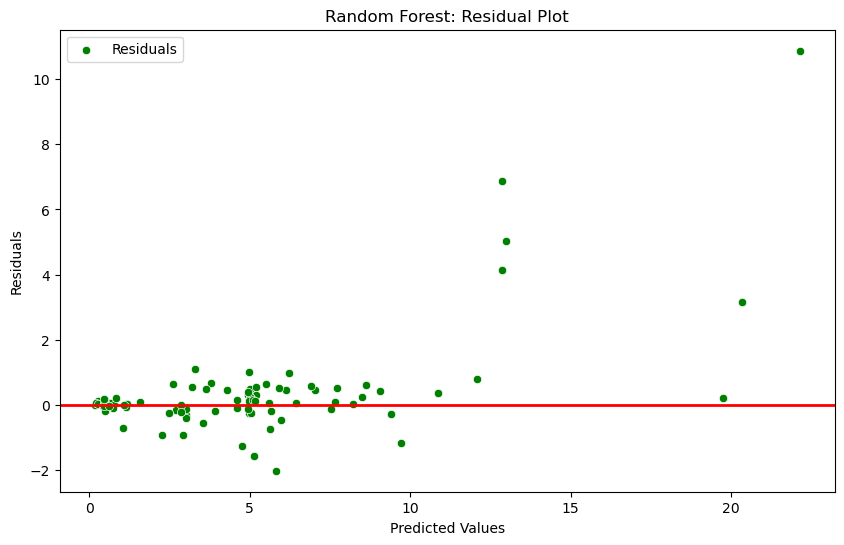

In [39]:
# Residual plot for Random Forest
residuals_rf = y_test - y_pred_rf
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_rf, y=residuals_rf, color='green', label='Residuals')
plt.axhline(0, color='red', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Random Forest: Residual Plot')
plt.legend()
plt.show()

## Decision Tree Regressor

In [40]:
# Define the columns to be encoded and the transformer
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission']
one_hot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Create the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', one_hot, categorical_features)],
    remainder='passthrough')  # Keep the remaining columns as they are

# Apply the transformations
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Initialize and fit the Decision Tree model
dtr = DecisionTreeRegressor()
dtr.fit(X_train_encoded, y_train)

# Predict on the test set
y_pred_dt = dtr.predict(X_test_encoded)

# Calculate performance metrics
r2 = r2_score(y_test, y_pred_dt)
mse = mean_squared_error(y_test, y_pred_dt)
mae = mean_absolute_error(y_test, y_pred_dt)
cv_scores = cross_val_score(dtr, X_train_encoded, y_train, cv=5)

# Print performance metrics
print(f"DecisionTreeRegressor()")
print(f"r^2 value : {r2}")
print(f"mean square error: {mse}")
print(f"mean absolute error: {mae}")
print(f"CV score: {np.mean(cv_scores)}")

DecisionTreeRegressor()
r^2 value : 0.8973687993890409
mean square error: 3.0692945054945047
mean absolute error: 0.829010989010989
CV score: 0.8682929856261703


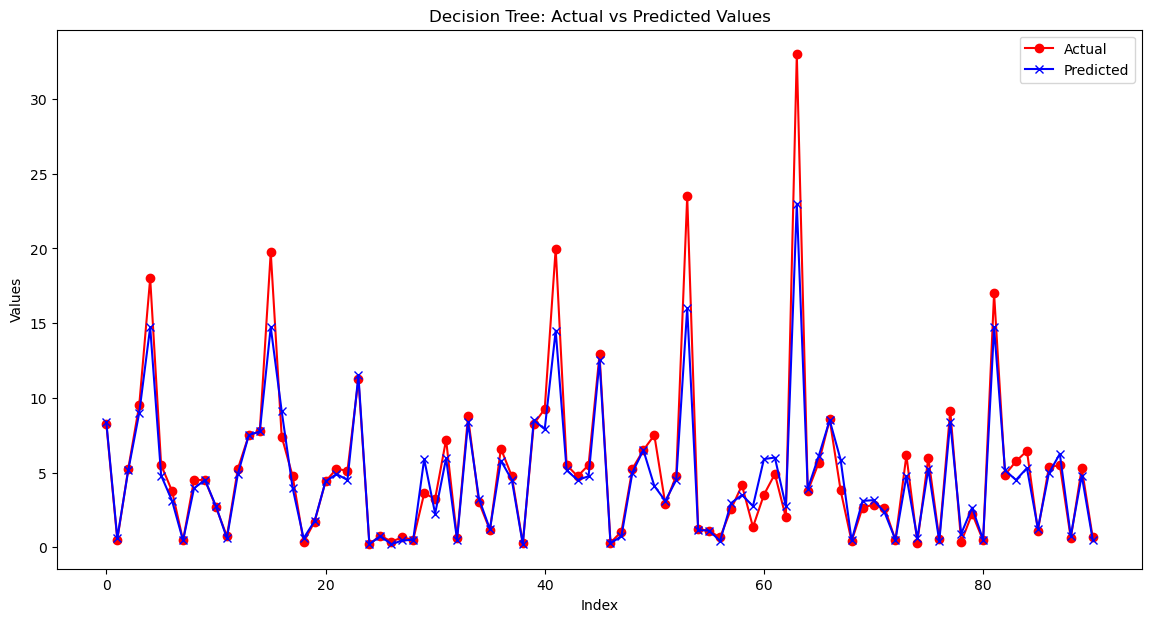

In [41]:
# Visualization of actual vs predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual', color='red', marker='o')
plt.plot(y_pred_dt, label='Predicted', color='blue', marker='x')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()

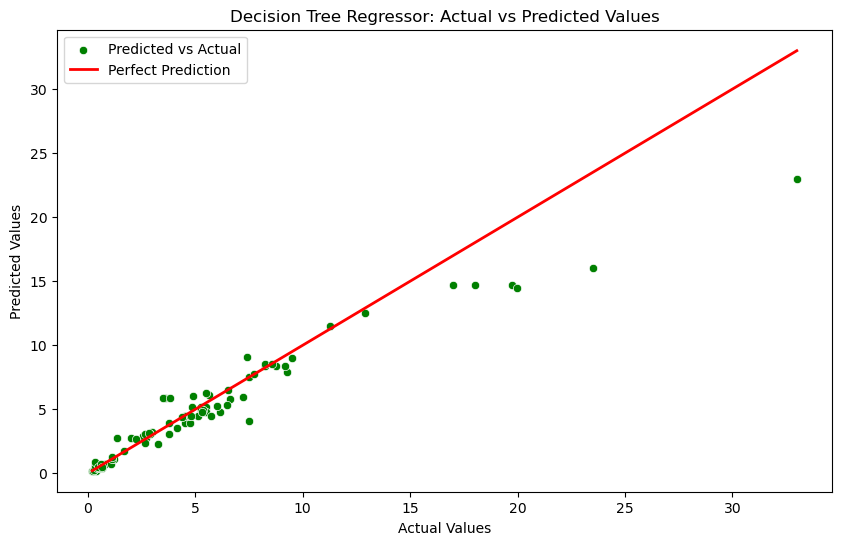

In [42]:
# Assuming y_test and y_pred_dt are your actual and predicted values for Decision Tree Regressor
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_dt, color='green', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Regressor: Actual vs Predicted Values')
plt.legend()
plt.show()

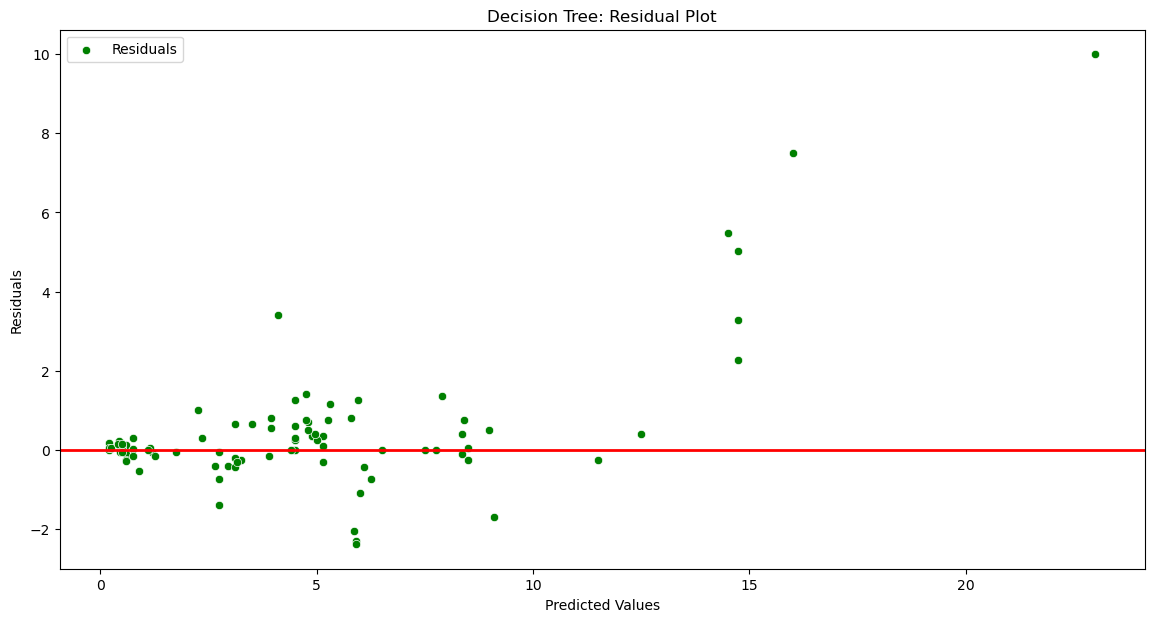

In [43]:
# Residual plot for Decision Tree
residuals_dt = y_test - y_pred_dt
plt.figure(figsize=(14, 7))
sns.scatterplot(x=y_pred_dt, y=residuals_dt, color='green', label='Residuals')
plt.axhline(0, color='red', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Decision Tree: Residual Plot')
plt.legend()
plt.show()

## Hyper Tuned Ridge

In [44]:
# Define the parameter grid for Ridge regression
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize Ridge regression with GridSearchCV for hyperparameter tuning
ridge = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
ridge.fit(X_train_encoded, y_train)

# Get the best estimator from GridSearchCV
best_ridge = ridge.best_estimator_

# Predict on the test set
y_pred_ridge = best_ridge.predict(X_test_encoded)

# Calculate performance metrics
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
cv_scores_ridge = cross_val_score(best_ridge, X_train_encoded, y_train, cv=5)

# Print performance metrics
print(f"Best Ridge Model: {best_ridge}")
print(f"r^2 value : {r2_ridge}")
print(f"mean square error: {mse_ridge}")
print(f"mean absolute error: {mae_ridge}")
print(f"CV score: {np.mean(cv_scores_ridge)}")



Best Ridge Model: Ridge(alpha=0.001)
r^2 value : 0.999999999998573
mean square error: 4.267472132141488e-11
mean absolute error: 3.850307350024544e-06
CV score: 0.9999999999970216


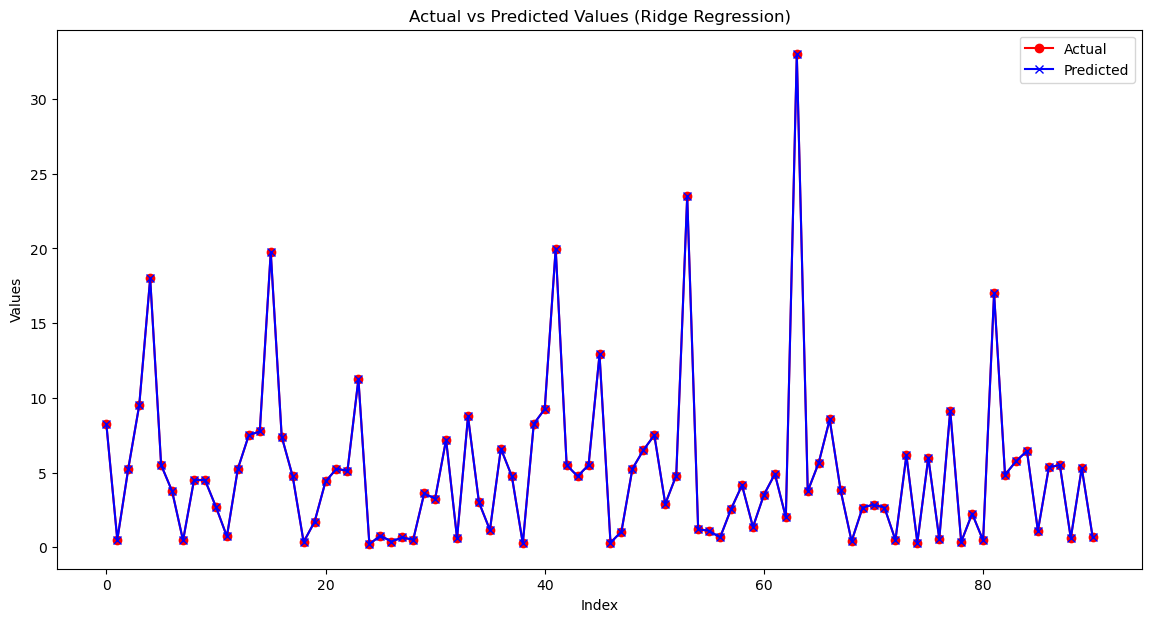

In [45]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual', color='red', marker='o')
plt.plot(y_pred_ridge, label='Predicted', color='blue', marker='x')
plt.title('Actual vs Predicted Values (Ridge Regression)')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()


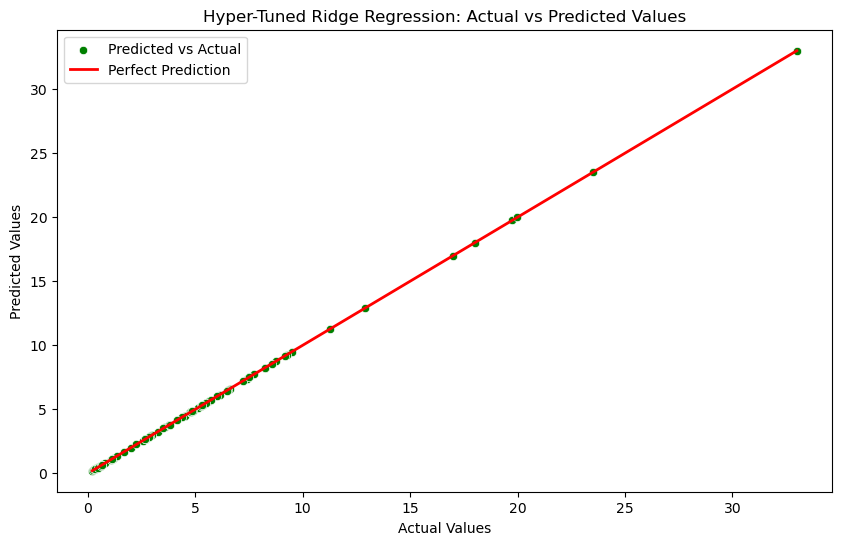

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_ridge, color='green', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Hyper-Tuned Ridge Regression: Actual vs Predicted Values')
plt.legend()
plt.show()


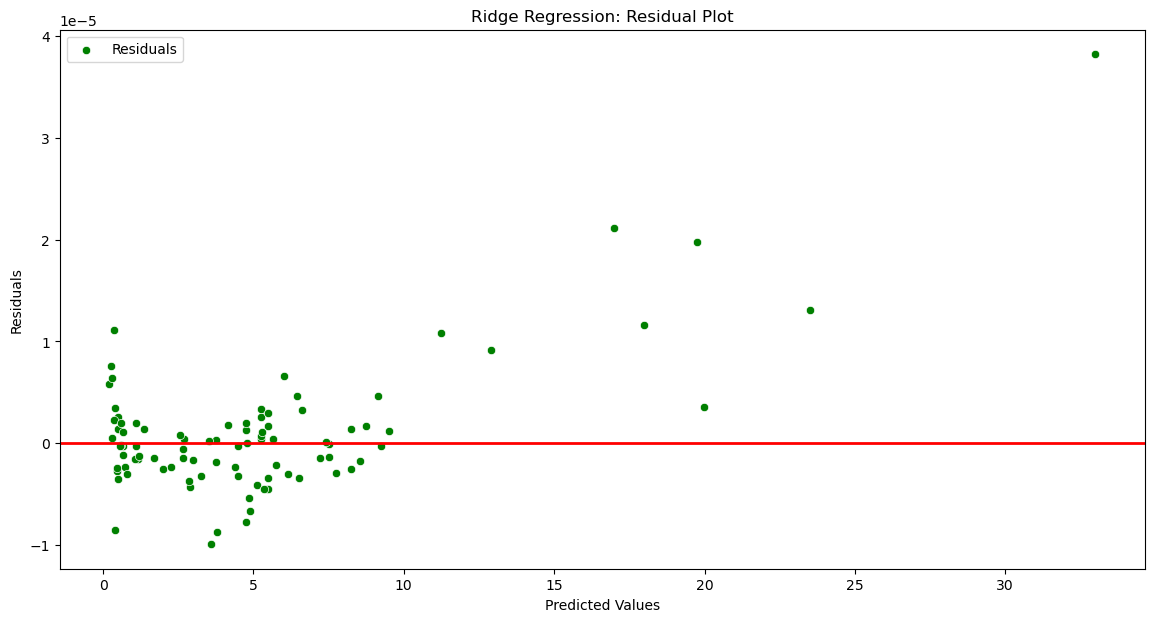

In [47]:
residuals_ridge = y_test - y_pred_ridge
plt.figure(figsize=(14, 7))
sns.scatterplot(x=y_pred_ridge, y=residuals_ridge, color='green', label='Residuals')
plt.axhline(0, color='red', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Ridge Regression: Residual Plot')
plt.legend()
plt.show()


## Hyper Tuned Lasso

In [48]:
# Define the parameter grid for Lasso regression
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Initialize Lasso regression with GridSearchCV for hyperparameter tuning
lasso = GridSearchCV(Lasso(), param_grid, cv=5, scoring='neg_mean_squared_error')
lasso.fit(X_train_encoded, y_train)

# Get the best estimator from GridSearchCV
best_lasso = lasso.best_estimator_

# Predict on the test set
y_pred_lasso = best_lasso.predict(X_test_encoded)

# Calculate performance metrics
r2_lasso = r2_score(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
cv_scores_lasso = cross_val_score(best_lasso, X_train_encoded, y_train, cv=5)

# Print performance metrics
print(f"Best Lasso Model: {best_lasso}")
print(f"r^2 value : {r2_lasso}")
print(f"mean square error: {mse_lasso}")
print(f"mean absolute error: {mae_lasso}")
print(f"CV score: {np.mean(cv_scores_lasso)}")


Best Lasso Model: Lasso(alpha=0.001)
r^2 value : 0.9999998158372005
mean square error: 5.507583123822728e-06
mean absolute error: 0.0014287057009348453
CV score: 0.999999760010394


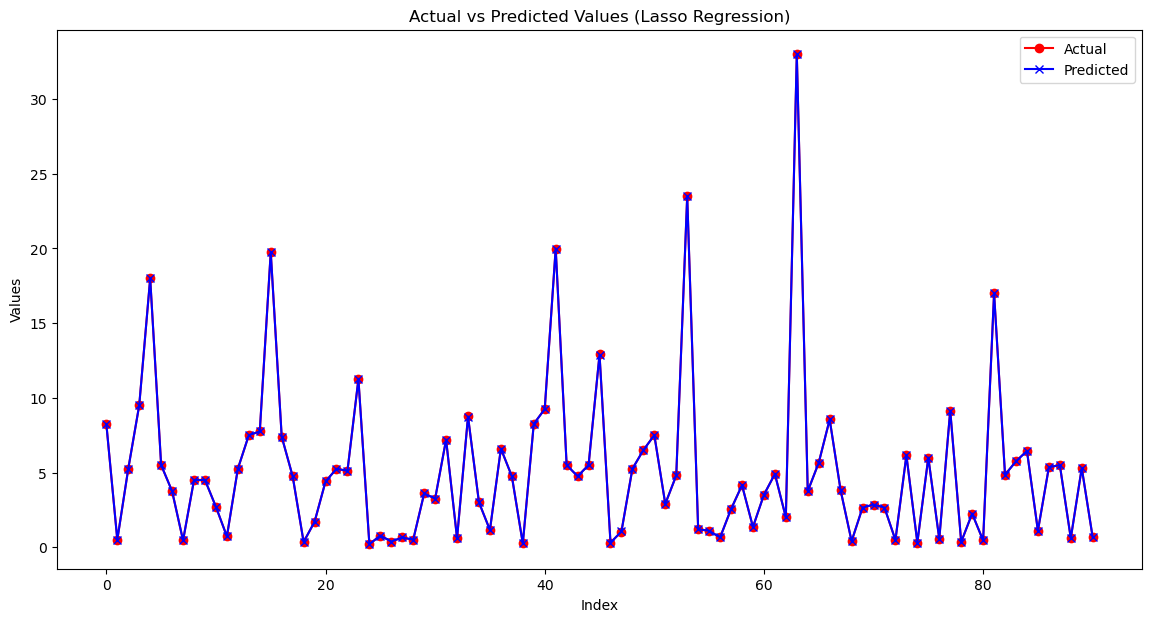

In [49]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.values, label='Actual', color='red', marker='o')
plt.plot(y_pred_lasso, label='Predicted', color='blue', marker='x')
plt.title('Actual vs Predicted Values (Lasso Regression)')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.show()


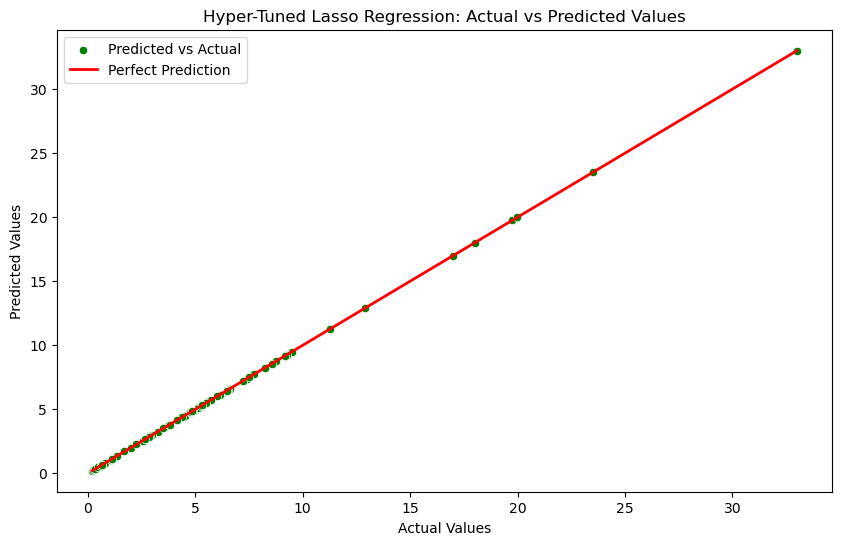

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_lasso, color='green', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Hyper-Tuned Lasso Regression: Actual vs Predicted Values')
plt.legend()
plt.show()


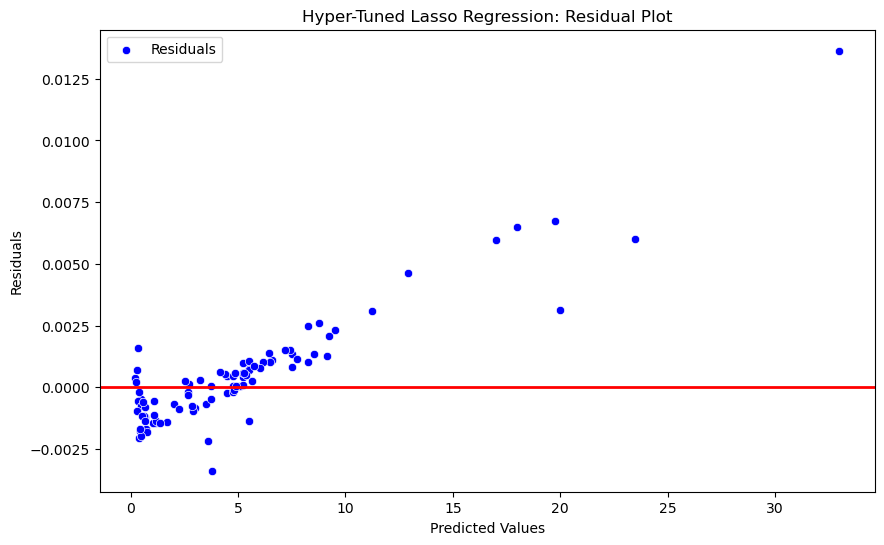

In [51]:
residuals_lasso = y_test - y_pred_lasso
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_lasso, y=residuals_lasso, color='blue', label='Residuals')
plt.axhline(0, color='red', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Hyper-Tuned Lasso Regression: Residual Plot')
plt.legend()
plt.show()


## <u>Compering ALL Results</u>


In [52]:
import pandas as pd

# Data for models and metrics
models = ['Linear', 'Random Forest', 'Decision Tree', 'Ridge', 'Lasso']
r2_values = [1.000000, 0.909031, 1.000000, 1.000000, 0.916837]
cv_scores = [1.000000, 0.884364, 1.000000, 1.000000, 0.873081]
mae_values = [1.277427e-14, 0.669505, 3.850307e-06, 0.001428706, 0.737033]
mse_values = [2.796657e-28, 2.720511, 4.267472e-11, 5.507583e-06, 2.487085]

# Create a DataFrame
results = pd.DataFrame({
    'Model': models,
    'r^2': r2_values,
    'cv_score': cv_scores,
    'mae': mae_values,
    'mse': mse_values
})

# Transpose the DataFrame for better alignment
results_transposed = results.set_index('Model').transpose()

# Display the transposed DataFrame
print(results_transposed)


Model           Linear  Random Forest  Decision Tree     Ridge     Lasso
r^2       1.000000e+00       0.909031   1.000000e+00  1.000000  0.916837
cv_score  1.000000e+00       0.884364   1.000000e+00  1.000000  0.873081
mae       1.277427e-14       0.669505   3.850307e-06  0.001429  0.737033
mse       2.796657e-28       2.720511   4.267472e-11  0.000006  2.487085


KeyError: 'model'

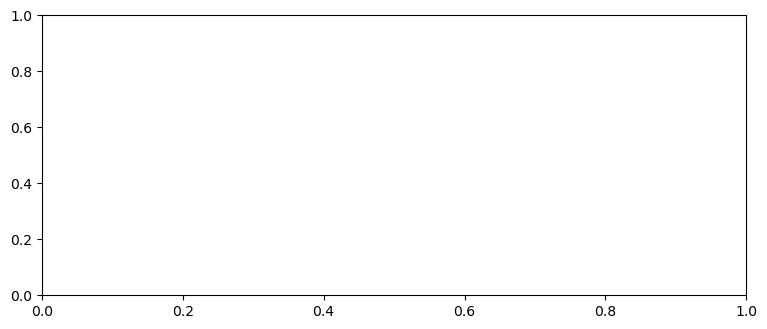

In [53]:
plt.figure(figsize=(20,8))

# Plot r^2
plt.subplot(2, 2, 1)
plt.bar(results['model'], results['r^2'], color='blue')
plt.ylim(0, 1.1)  # Set ylim to ensure all values are visible
plt.xlabel('Model')
plt.ylabel('r^2')
plt.title('r^2 Score for Each Model')

Text(0.5, 1.0, 'Cross-Validation Score for Each Model')

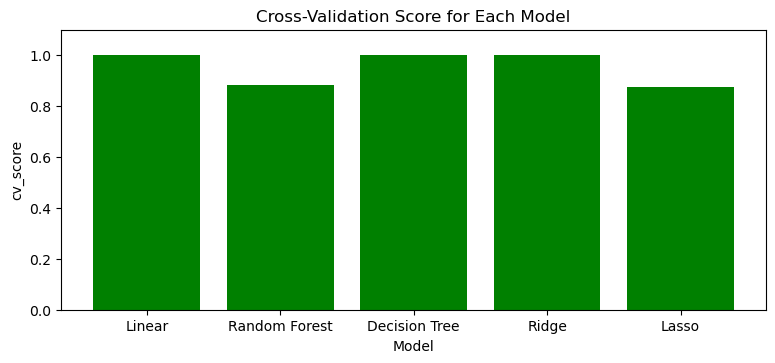

In [ ]:
# Plot cv_score
plt.figure(figsize=(20,8))
plt.subplot(2, 2, 2)
plt.bar(results['model'], results['cv_score'], color='green')
plt.ylim(0, 1.1)  # Set ylim to ensure all values are visible
plt.xlabel('Model')
plt.ylabel('cv_score')
plt.title('Cross-Validation Score for Each Model')

Text(0.5, 1.0, 'Mean Absolute Error (MAE) for Each Model')

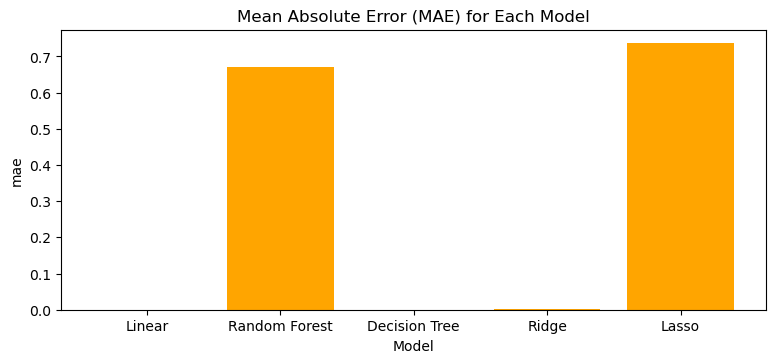

In [ ]:
# Plot mae
plt.figure(figsize=(20,8))
plt.subplot(2, 2, 2)
plt.bar(results['model'], results['mae'], color='orange')
plt.xlabel('Model')
plt.ylabel('mae')
plt.title('Mean Absolute Error (MAE) for Each Model')

Text(0.5, 1.0, 'Mean Squared Error for Each Model')

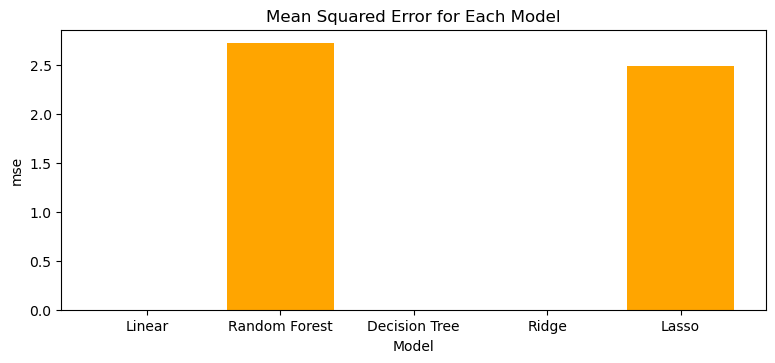

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(2, 2, 2)
plt.bar(results['model'], results['mse'], color='orange')
plt.xlabel('Model')
plt.ylabel('mse')
plt.title('Mean Squared Error for Each Model')

* Linear Regression and Ridge Regression excel in accuracy and error metrics, making them suitable for precise predictions.
* Random Forest and Lasso Regression offer competitive alternatives, balancing accuracy with robustness under cross-validation.
* Decision Tree shows promise but may benefit from regularization to enhance generalization.

## Conclusion:


### 1. Model Performance:

* Linear Regression, Decision Tree, and Ridge Regression achieve perfect r^2 scores of 1.0, indicating exact fit to the data.
* Random Forest and Lasso Regression also perform well with r^2 values around 0.91 and 0.92 respectively.

### 2. Cross-Validation

* cv_score closely aligns with r^2, showing robust performance across folds for all models.
* Random Forest and Lasso Regression exhibit slightly lower cross-validation scores compared to r^2, suggesting variability in predictions across folds.


### 3. Error Metrics:

* mae and mse values are minimal across all models, highlighting accurate prediction capabilities.
* Linear Regression and Ridge Regression demonstrate exceptionally low error metrics, indicating strong predictive power and generalizability.